# C2-Overview of Supervised Learning

## Variable Types and Terminology

In this section, the authors introduce a number of variables that are frequently used in machine learning fields. The definition is very clear and is very important for beginers. 

## Two Simple Approaches to Prediction

### Linear Models and Least Squares
Formula: 

$$
\hat{Y}=\hat{\beta}_{0}+\sum_{j=1}^{p}X_{j}\hat{\beta}_{j}=X^T{\beta}. 
$$

`Fun fact`: $(X,\hat{Y})$ represents a hyperplane, which means if $(X,Y)$ is not close to a hyperplane, then the prediction will be very inaccurate.

`Assumption`: the relationship between the input and output is linear. In another word, the function $f$ of $y=f(x)$ is a hyperplane.

`Pros`: The number of learnable parameters is small, which is equal to the 1 + number of features. So the required number of data points to train the model is small. And easy to explain the prediction.

`Cons`: The relationship between the input and output maybe non-linear.

`When to use`: We you have a good prior that the relationship between the input and output is linear.

`How to compute the parameter` $\beta$: 
1. We can build a loss function with least squares, i.e., $$RSS(\beta)=\sum_{i=1}^N(y_i-x_i^T\beta)^2=(y-\textbf{X}\beta)^T(y-\textbf{Y}\beta),$$ where $\textbf{X}$ is a $N\times p$ matrix with each row as an input vector and $\textbf{y}$ is a $N$-vector.

2. We try to find a good $\beta$ to minimize the loss function $RSS(\beta)$. Since this is a quadratic function, we know the minimum value can be get when the derivative of this function w.r.t $\beta$ is zero, i.e., ${\bf X}^{T}({\bf y}-{\bf X}\beta)=0. $
if $X^TX$ is nonsingular, then we have the close-form solution $$\beta=({\bf X}^{T}{\bf X})^{-1}{\bf X}^{T}{\bf y}, $$


The book provides two scenarios. 

`Scenario 1`: The training data in each class were generated from bivariate Gaussian distributions with uncorrelated components and different means. 

`My understanding is`: each data has two features and there are at least two classes in dataset. The two features are generated from a bivariate Gaussian distribution. These two features are uncorrelated thus the componets of these bivariate distributions are uncorrelated. The means of these bivariate distributions for each class are different. Following is the formula of bivariate normal distribution and the code write by chatgpt from above description. You can see the bivariate normal distribution describes the joint distribution of two random variables.

\begin{align}
p(X=x,Y=y)&={\frac{1}{2\pi\sigma_{x}\sigma_{y}{\sqrt{1-\rho^{2}}}}}\cdot\\
&\exp\left[-{\frac{1}{2(1-\rho^{2})}}\left({\frac{(x-\mu_{x})^{2}}{\sigma_{x}^{2}}}+{\frac{(y-\mu_{y})^{2}}{\sigma_{y}^{2}}}-{\frac{2\rho(x-\mu_{x})(y-\mu_{y})}{\sigma_{x}\sigma_{y}}}\right)\right] 
\end{align}

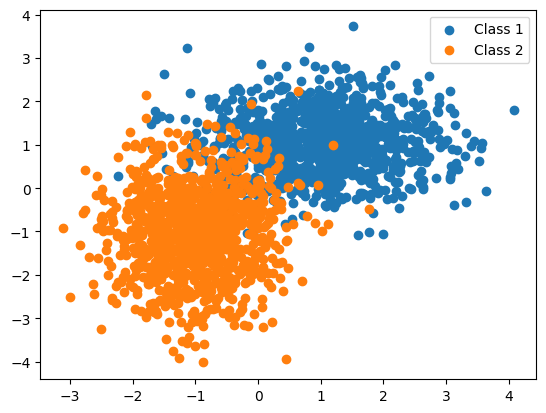

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(42)

# Define the number of data points to generate
num_samples = 1000

# Define the means for each Gaussian distribution
mean1 = [1, 1]
mean2 = [-1, -1]

# Define the covariance matrix for each Gaussian distribution
cov1 = np.array([[1, 0], [0, 0.5]])
cov2 = np.array([[0.5, 0], [0, 1]])

# Generate the data points from the bivariate Gaussian distributions
# data1 for class1 and data2 for class2
# the joint distribution requires the mean in d-dimensional space where d is the number of features, and the covariance matrix which is a d x d matrix
data1 = np.random.multivariate_normal(mean1, cov1, num_samples)
data2 = np.random.multivariate_normal(mean2, cov2, num_samples)

# Plot the generated data points
plt.scatter(data1[:, 0], data1[:, 1], label='Class 1')
plt.scatter(data2[:, 0], data2[:, 1], label='Class 2')
plt.legend()
plt.show()

This is the 3-D visualization of a bivariate normal distribution.

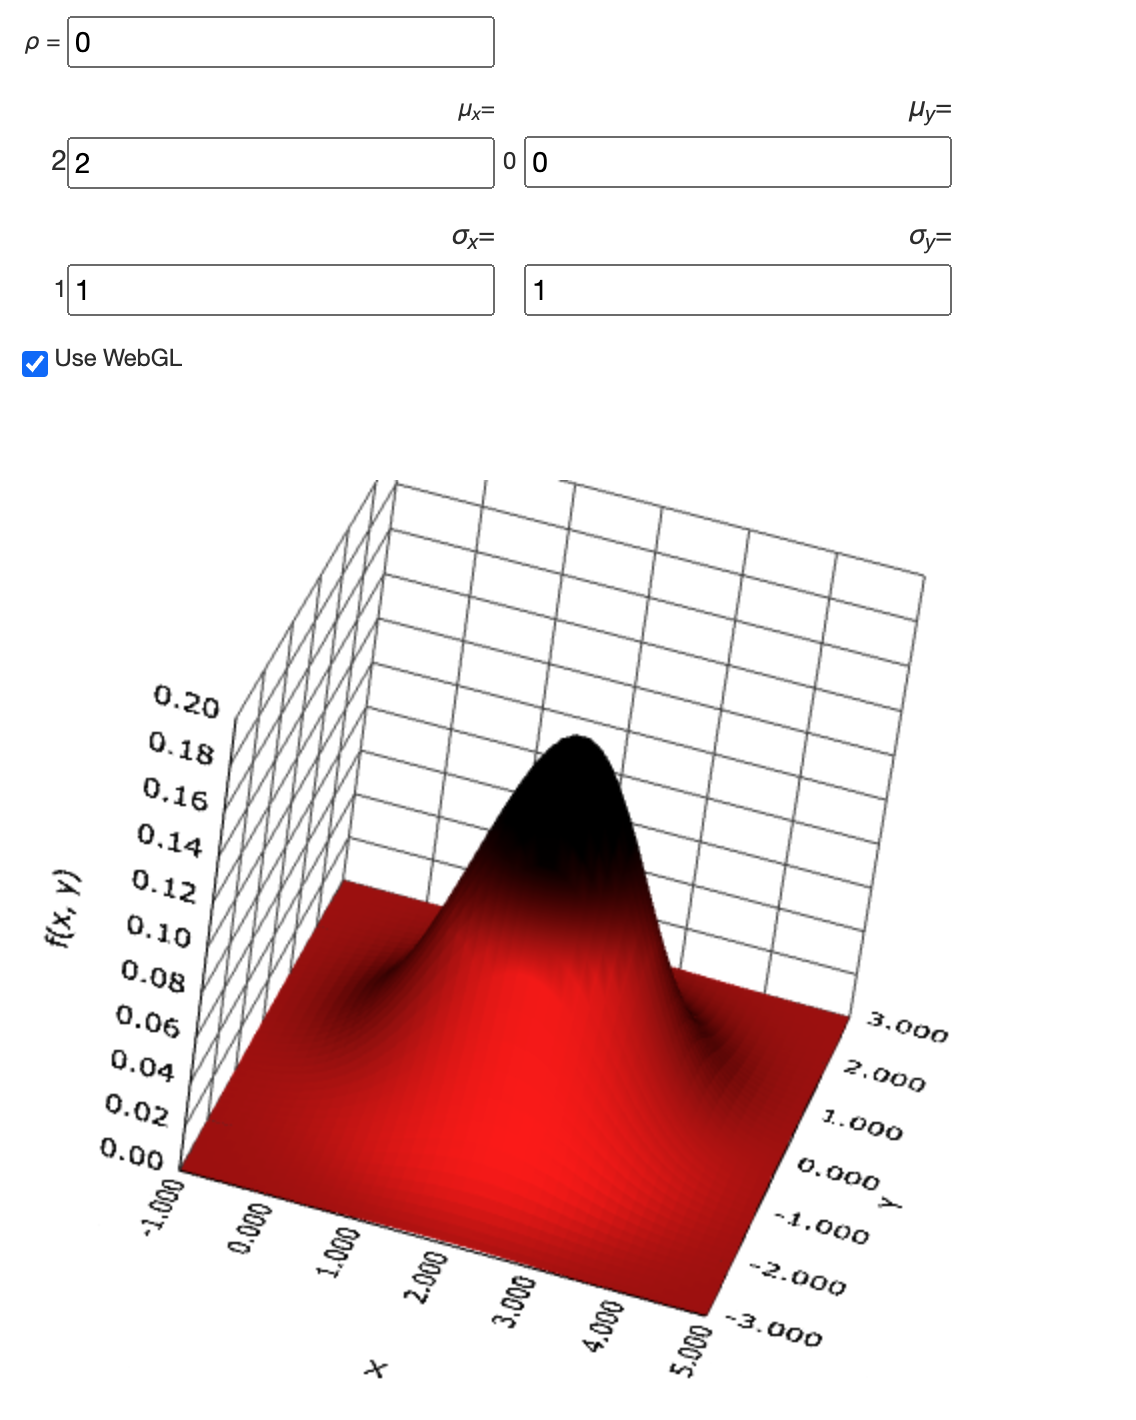

In [2]:
from IPython.display import Image
Image("./imgs/bivariate normal distribution.png")


`Scenario2`: The training data in each class came from a mixture of 10 low-variance Gaussian distributions, with individual means themselves distributed as Gaussian.

`My understanding is`: Firstly and most importantly, I just realized that the mixture model means the data is generated from one randomly-choosed components from the mixture model. However, this sentence did not imply the that each class is generated from the same mixture model or different one. Also, the number of feature is ambiguous in this sentence. If the feature number is two, then each distribution in the mixture model is bivariate Gaussian distribution. Finnaly, for these 10 Gaussian distributions, their means are sampled from a Gaussian distribution.

$$
\hat{Y}=\hat{\beta}_{0}+\sum_{j=1}^{p}X_{j}\hat{\beta}_{j}=X^T{\beta}. 
$$

In section 2.3.3, it provides the details of generating data in sceario2. Again, the following code is written by chatgpt.

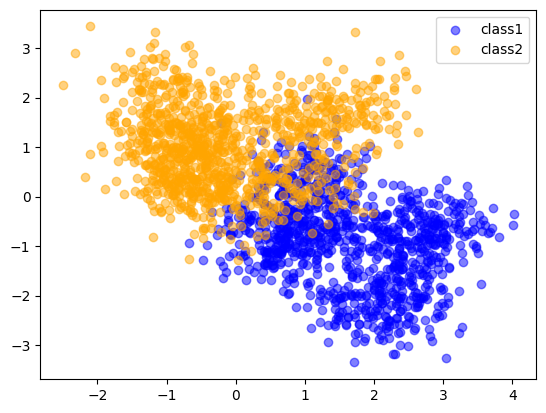

In [2]:
import numpy as np

# Generate means for BLUE class
np.random.seed(1)
blue_means = np.random.multivariate_normal(mean=[1, 0], cov=np.eye(2), size=10)

# Generate means for ORANGE class
orange_means = np.random.multivariate_normal(mean=[0, 1], cov=np.eye(2), size=10)

# Generate BLUE class data
blue_data = np.empty((0, 2))
for _ in range(1000):
    mean = blue_means[np.random.randint(0, 10)]
    sample = np.random.multivariate_normal(mean=mean, cov=np.eye(2)/5)
    blue_data = np.vstack([blue_data, sample])

# Generate ORANGE class data
orange_data = np.empty((0, 2))
for _ in range(1000):
    mean = orange_means[np.random.randint(0, 10)]
    sample = np.random.multivariate_normal(mean=mean, cov=np.eye(2)/5)
    orange_data = np.vstack([orange_data, sample])

# Plot the data
import matplotlib.pyplot as plt

plt.scatter(blue_data[:,0], blue_data[:,1], color='blue', alpha=0.5, label='class1')
plt.scatter(orange_data[:,0], orange_data[:,1], color='orange', alpha=0.5, label='class2')
plt.legend()
plt.show()


```{important}
Bivariate normal distribution is a joint distribution of two random variables. 

Mixture model is a probability distribution that is a linear combination of other probability distributions. Each data in randomly generated from one of the components in the mixture model.
```

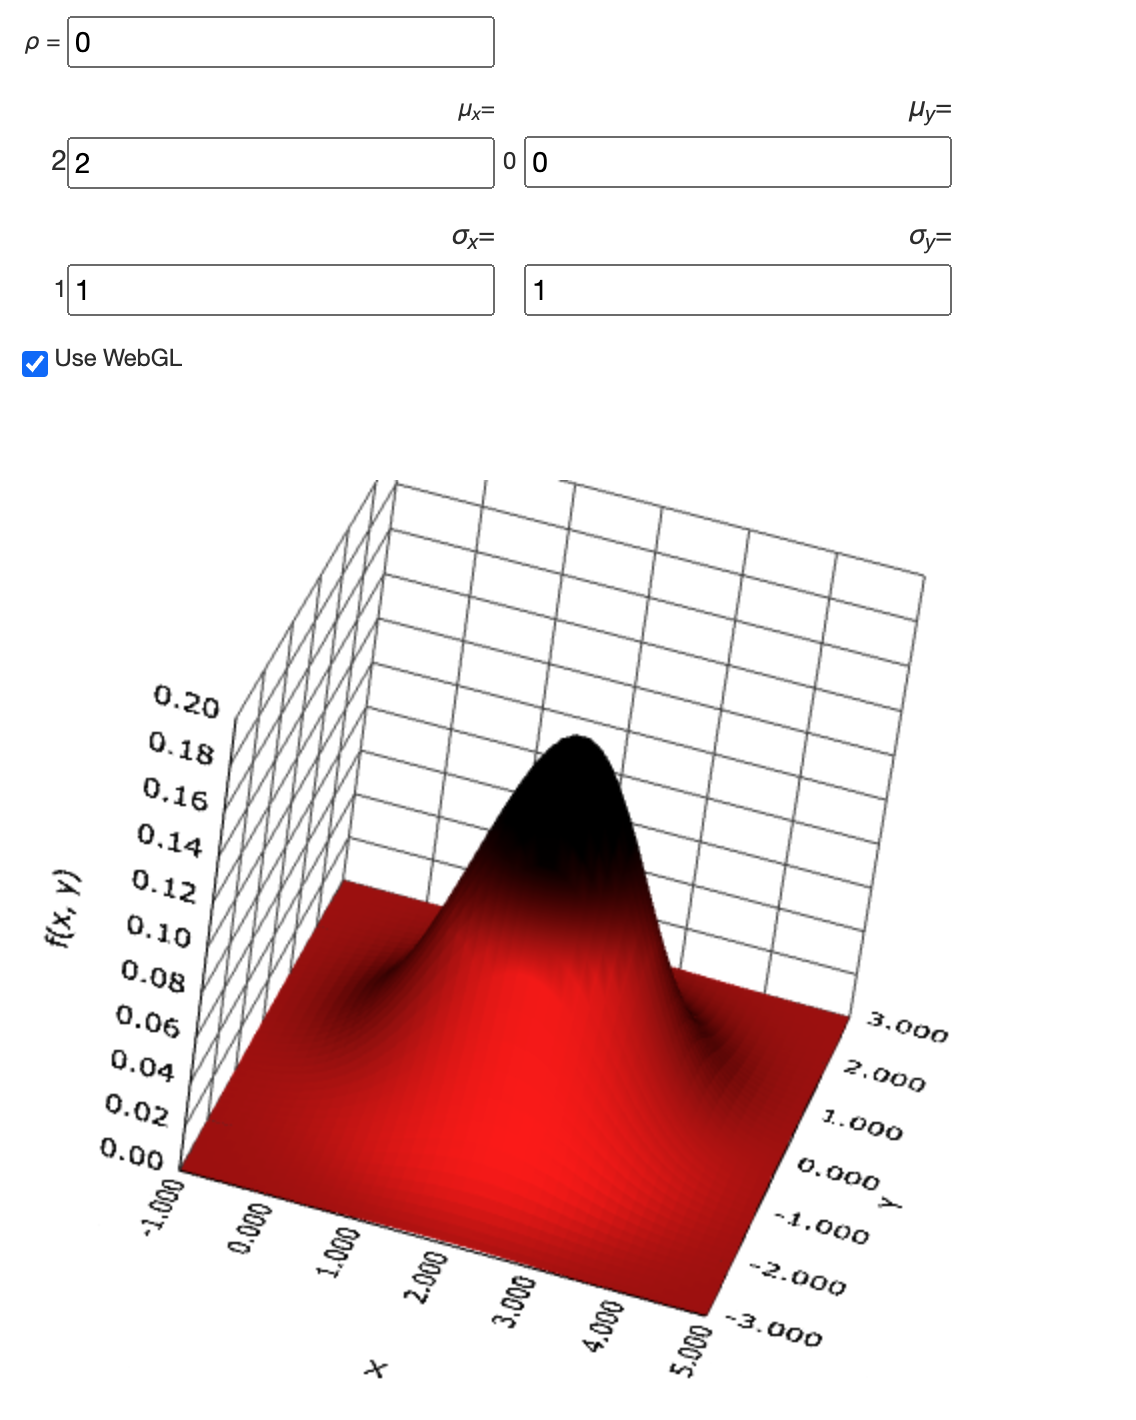

In [3]:
from IPython.display import Image
Image("./imgs/bivariate normal distribution.png")


### K Nearest Neighbors
`Assumption`: Not mentioned in the book, but in fact it assume the same-class data are distributed closely in Euclidean space which might not be true, e.g., a grayscale cat is far way from colored cat in Euclidean space but they are from the same class.

`Pros`: Potential low bias.

`Cons`: Potential high variance.

`When to use`: small dataset and low-dimensional dataset.

`Fun fact`: KNN can condiered as assigning 0-1 weights to each data accroding to the distance. Kernel methods can be considered as soft method with smoothly assign weights according to the distance.

`Fun conclusion`: The book says: linear models fit to a basis expansion of the original inputs allow arbitrarily complex models. According to chatgpt, the meaning of basis expansion is that we can use polynomial basis to expand the original input. For example, if the original input is $x$, then we can use $x^2$ as the new input. Then we can use linear model to fit the new input. More generally, we have $$y = w_0 + w_1 f_1(x) + w_2 f_2(x) + \cdots + w_n f_n(x),$$ where $f_i(x)$ is the $i$-th basis function which could be a non-linear function, e.g., $f_2(x)=x^2$ and $f_3(x)=x^3$.

`fun conclusion2`: Projection pursuit and neural network models consist of sums of non-linearly transformed linear models. The projection pursuit is $$y = \sum_{j=1}^J g_j(\mathbf{w}_j^T \mathbf{x}),$$ where $g_j$ is a non-linear function and $\mathbf{w}_j$ is a weight vector. In another word, projection pursuit model can be considered as nonlinearly transform a bunch of linear models and sum the results. The neural network model is similar, $$y = \sum_{j=1}^J w_j^{(2)} g\left(\sum_{i=1}^I w_{ij}^{(1)} x_i + w_{j0}^{(1)}\right) + w_0^{(2)},$$ where $y$ is the output, $x_i$ is the $i$-th input feature, $w_{ij}^{(1)}$ is the weight for the connection between the $i$-th input feature and the $j$-th hidden unit, $w_{j0}^{(1)}$ is the bias term for the $j$-th hidden unit, $w_j^{(2)}$ is the weight for the connection between the $j$-th hidden unit and the output, $g$ is a non-linear activation function applied to the sum of inputs to the $j$-th hidden unit.


## Statistical Decision Theory

The statistical decision theory is trying to choose a decision rule that minimizes a loss function. In another word, after we have a loss function, the theory researchs how to minimize it. 

Firstly, the book introduces the expected prediction error (EPE). The first loss function is the mean square loss. After some derivation, we know the way to minimize this loss function is set the model as $f(x)=E(Y|X)$.

\begin{align}
EPE(f)&=E(Y-f(x)^2)  \\
&=\int[y-f(x)]^2 P(dx,dy) \\
&=E_XE_{Y|X}([Y-f(X)]^2|X) \\
\Rightarrow  f(x) & = \arg\min_c E_{Y|X}([Y-c]^2|X) \\
\Rightarrow  f(x) & = E(Y|X) \\
\end{align}

However, we can also use $L_1$ loss function, in this case

\begin{align}
EPE(f)&=E(|Y-f(x)|)  \\
\Rightarrow  f(x) & = \mathrm{median}(Y|X) \\
\end{align}

This is counterintuitive yet right, i.e., when you use $L_1$ loss function, the optimal prediction is the median of the conditional distribution of $Y$ given $X$. The reason is that the median is the value that minimizes the sum of absolute deviations from the median.

The following code is an exmaple of the comparison.

In [3]:
import numpy as np
a = np.array([1,2,3,4,5,10,12])
mean = a.mean()
median = np.median(a)
mean, median
(a - median).__abs__().sum(), (a - mean).__abs__().sum()

(21.0, 22.857142857142858)

For categorical prediction, we usually exploit 0-1 loss function. Omit all of the derivation, we know the optimal prediction is predict the data as the class with the highest conditional probability.
$$
{\hat{G}}(x)={\arg\min}_{g\in{\mathcal{G}}}[1-{\mathrm{Pr}}(g|X=x)]=\max_g P(g|X=x)
$$

```{important}
For regression, mean square loss function enoucrage us to find the expected value of $Y|X$.

L1 loss encourages us to find the median of $Y|X$.

For classification, Bayes classifier encourages us to find the class with the highest conditional probability.
```

```{note}
The classifier always assign the label with the highest conditional probability is called the *Bayes classifier*. The error rate of Bayes classifier is the *Bayes rate*.
```


As for KNN, we can think it relax the highest conditional probability to the marjotity vote in the neighborhood. In another word, the conditional probability is estimated by the proportion of the labels in the neighborhood. 

:::{important}
When $K\rightarrow\infty$ and $N\rightarrow\infty$, the neighboorhood of a data is compact and the proportion of the labels in the neighborhood is the same as the conditional probability. In this case, KNN is the same as Bayes classifier. But high-dimensions breaks down this intuition and the phenomenon is called *curse of dimensionality*.
:::

## 2.5 Local Methods in High Dimensions
In this section, the book introduces the curse of dimensionality. It provides some examples and figures to illustrate the phenomenon. Also, it uses the bias-variance decomposition to explain the phenomenon. However, the derivation is not very clear. 

Also, I did not find the explaination of local methods. In my understanding, it is trying to say that KNN is based on the local neighborhood of a data. Thus, KNN is the refered local method. And inded, this subsection discusses why KNN performs badly on high dimension. Such conclusion can be generalized to other methods based on the local neighborhood.

**By the way, the local methods assumme the $f(x)$ is locally constant, i.e., when we have many data $\{x_j\}$ close to $x_i$ which we trying to predict, the $f(x)$ does not change much. Thus, we can use the average of $f(x_j)=y_j,j\in N(i)$ produce $\hat{f}(x_i)$**.

## 2.6 Statistical Models, Supervised Learning and Function Approximation
### Statistical Models
According to chatgpt, statistical models are the simplified description of real-world relationship between variables. It trying to use mathmatical formula to represent the relationship.

### Supervised Learning
Supvervised learning is exploiting labels/reponse as the teacher to learn your statistical model.

### Function Approximation
This part is pretty close the statistical models section by my understanding. The function describes the relationship between input and output is same as the statistical model as far as I concern. When the function is complex, i.e., not linear or described by a Gaussian distribution, we can think about using an additive model consist of some basis function to approximate it. Then we can learn this function with choosen loss function.

The definition of additive model is $$
f(X)=\sum_{j=1}^{p}f_{j}(X_{j}). $$

Where the $p$ is the number of features. Thus, the additive model consider that the output is the sum of non-linear transformed features. The most noticeable characteristic of additive model is that it did not capture the relationship between features.

I did not get any useful information in this subsections at all.

## Structured Regression Models
KNN not only performs bad in high dimension, but also underperformed by structured models when they more efficiently use data.

At here, my understanding is the structured models are the models that can exploit the structure of the data.

### Difficulty of the Problem
When we minimize the RSS loss function, there are actually infinite solutions, i.e., $RSS(f)=\sum_{i=}^N(y_i-f(x_i))^2.$ In order to restrict the eligible solutions to RSS, we have to consider the test data. In other words, we want to find a function that can minimize the RSS on the training data and testing data, which natually limited the solutions.

:::{warning}
At the end of this subsection, the author gives an interesting conclusion

> Any method that attempts to produce locally varying functions in small isotropic neighborhoods will run into problems in high dimensions—again the curse of dimensionality. And conversely, all methods that overcome the dimensionality problems have an associated and often implicit or adaptive metric for measuring neighborhoods, which basically does not allow the neighborhood to be simultaneously small in all directions.

However, I did not get how to find a neighborhood measurement that does not allow the neighborhood to be small in all directions?
:::

## Classes of Restricted Estimators
In this section, the book introduces some restricted estimators, i.e., adding some restriction on the loss function to limit the solutions and improve the generalization on the test data.

````{card}

Section Summary
^^^
1. The most famous way: add regularization term to the loss function. In this book, it is also called *penalty*. We want the $f$ to be smooth, i.e., to be a low-order polynomial. I think it is pretty much same as the Okham's Razor.
2. The second way: approximate $f$ directly by kernel method. In this way, we believe kernel function is a part of $f$. KNN can be considered as a special case of kernel method.
3. The third way: basis functions and dictionary method (the method automatically choose some basis functions from a large set of them). The NN is the most famous example of this method. Since we have build a profile of the target function $f$ (as the sum of basis functions), we can also consider this method as a restricted estimator.
````


:::{important}
The book says

>Each of the classes has associated with it one or more parameters, sometimes appropriately called smoothing parameters, that control the effective size of the local neighborhood. 

Thus, the smoothing parameter is trying to control size of local neighborhood. But needs to be confirmed by specific examples.
:::

### 2.8.1 Roughness Penalty and Bayesian Methods
Penalized least-squares criterion is defined as:
$$
\mathrm{PRSS}(f;\lambda)=\sum_{i=1}^{N}(y_{i}-f(x_{i}))^{2}+\lambda\int[f^{\prime\prime}(x)]^{2}d x. 
$$
and we can see the second term introduces the penality on the complexity of the funcion $f$ and encourages it to be a low-order polynomial. If $\lambda=\infty$, then $f$ has to be linear function, otherwise the PRSS will be infinite as well. 

In machine learning, the second term is called *regularization*.

### 2.8.2 Kernel Methods and Local Regression
In last subsection, we just add a penalty to the $\hat{f}_\theta$, which means we try to approximate $f$ with $\hat{f}_\theta$. The penalty is just for limit solutions and increase generalization. 

However, in this subsection, the kernel methods and local regression explictly estimate $f$ by modifying $\hat{f}_\theta$. These two classes seems similar in formula but their ideas are different.

Given a Gaussian kernel function, $$
K_{\lambda}(x_{0},x)=\frac{1}{\lambda}\exp\left[-\frac{||x-x_{0}||^{2}}{2\lambda}\right],$$ the simplest form of kernel estimate is the Nadaraya–Watson weighted average $$
\hat{f}(x_{0})=\frac{\sum_{i=1}^{N}K_{\lambda}(x_{0},x_{i})y_{i}}{\sum_{i=1}^{N}K_{\lambda}(x_{0},x_{i})}. $$
You can see it is just a reweighted voting of all labels, where the weight exponentially decays with the distance from the point $x_0$, which is the point we want to predict. 

The book also provides a local regression estimate of $f(x_0)$ as $\hat{f}_\theta(x_0)$ where $\theta$ minimizes 


```{math}
:label: eq-local regression

\mathrm{RSS}(f_{\theta},x_{0})=\sum_{i=1}^{N}K_{\lambda}(x_{0},x_{i})(y_{i}-f_{\theta}(x_{i}))^{2}, 
```

**However, the book did not tell me how to learn this estimation $\hat{f}_\theta(x)$. You can not use the Equation {eq}`eq-local regression` as a loss function to minimize since $x_0$ is your testing data.**

Moreover, KNN can also be considered as a type of kernel method, i.e., 
$$
K_{k}(x,x_{0})=I(||x-x_{0}||\leq||x_{(k)}-x_{0}||), 
$$

##  2.8.3 Basis Functions and Dictionary Methods
In this subsection, the book introduces the basis function method. The idea is to approximate $f$ with a linear combination of basis functions, i.e., $$f_{\theta}(x)=\sum_{m=1}^{M}\theta_{m}h_{m}(x), $$ where $h$ is one of the basis function. The radial basis function is a common choice of basis function, where $h(x)=K_{\lambda_m}(\mu_m,x)=e^{\frac{-|x-\mu|^2}{2\lambda}}$, a.k.a the Gaussian kernel function. 

A single-layer feed-forward neural network moidel with linear output weigts can be tought of as an adaptive basis function method, i.e., $$f_{\theta}(x)=\sum_{m=1}^{M}\beta_{m}\sigma({\alpha_{m}^{T}}x+b_{m}), $$ where $\sigma$ is the sigmoid function. The $\alpha$ and $b$ are the parameters of the hidden layer. 

According to chatgpt, the reason that NN is adaptive basis function method is that the $\alpha$ and $b$ are learned from the training data. In this case, the radial basis functions with learnable $\mu$ and $\lambda$ can also be considered as an adaptive basis function method. The statistists create another fancy word for such an adaptive basis function method, i.e., *dictionary method*. Because they think such a method can automatically select some basis functions from a set of them.

## 2.9 Model Selection and the Bias–Variance Tradeoff
Reading the title, we think this part I am very familiar with, i.e., given multiple models (such as a radial basis functions with different parameters or KNN with different K), how to determine which one is used for inference. The expected prediction error can be decomposed into square of bias + variance + irreducible error.